<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/Real_Project/Titanic_(kaggle).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
seed = 3
np.random.seed(seed)

**Check Data set**

In [174]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [175]:
print('Train set:',df_train.shape)
print('Test set:',df_test.shape)
print('------------[Train Data Infomation]-------------')
print(df_train.info())
print('------------[Test Data Infomation]-------------')
print(df_test.info())

Train set: (891, 12)
Test set: (418, 11)
------------[Train Data Infomation]-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
------------[Test Data Infomation]-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 column

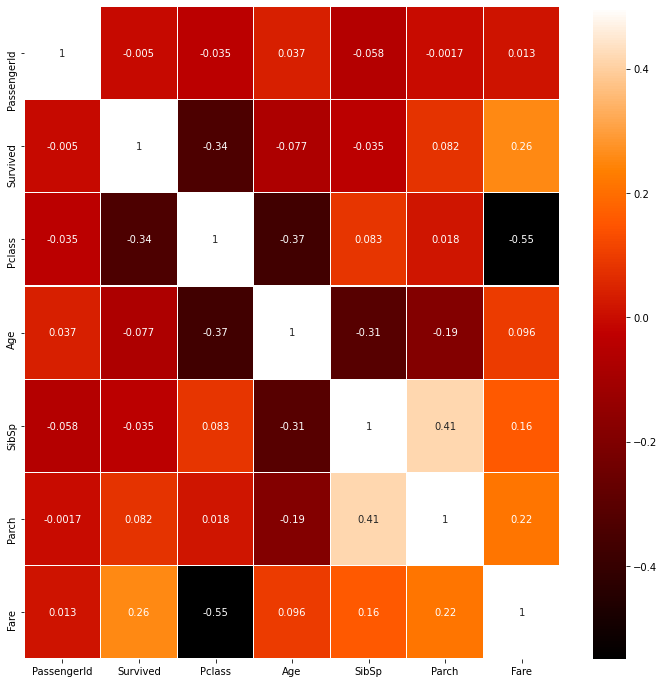

In [176]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)

In [177]:
feature_ratio = df_train['Sex'].value_counts(sort=False) # 'Sex'특성의 종류와 개수 -> {male:#, female:#}
feature_size = feature_ratio.size # Unique의 개수 _ 2
survived = df_train[df_train['Survived']==1]['Age'] # Survived가 1인 sample의 'Age'를 따온 리스트
print(feature_ratio.index)

Index(['female', 'male'], dtype='object')


In [180]:
def pie_chart(feature):
  feature_ratio = df_train[feature].value_counts(sort=False) # {male:#, female:#}
  feature_size = feature_ratio.size # 2 _ (male,female)
  feature_index = feature_ratio.index # Index(['female', 'male'], dtype='object')
  survived = df_train[df_train['Survived'] == 1][feature].value_counts() #해당 feature에서 생존한 사람들에 대해서 새로운 list 생성 -> {male:#, female:#}
  dead = df_train[df_train['Survived'] == 0][feature].value_counts() #해당 feature에서 사망한 사람들에 대해서 새로운 list 생성 -> {male:#, female:#}
  
  #Total ratio
  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
  plt.title(feature + '\'s ratio in total')
  plt.show()
  
  #sub ratio
  for i, index in enumerate(feature_index):
    plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
    plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
    plt.title(str(index) + '\'s ratio')
  plt.show()

In [181]:
def bar_chart(feature):
  survived = df_train[df_train['Survived']==1][feature].value_counts()
  dead = df_train[df_train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

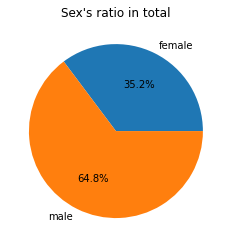

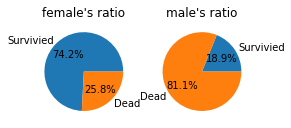

In [182]:
pie_chart('Sex')

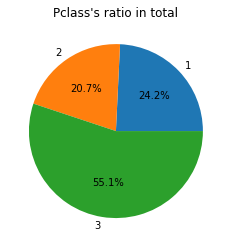

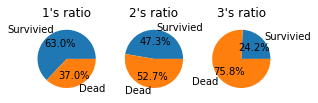

In [183]:
pie_chart('Pclass')

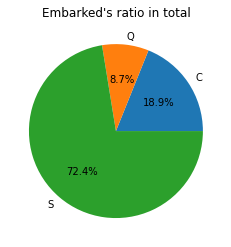

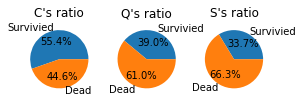

In [184]:
pie_chart('Embarked')

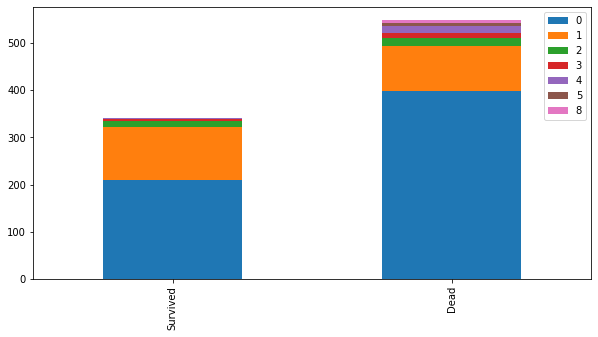

In [186]:
bar_chart('SibSp')

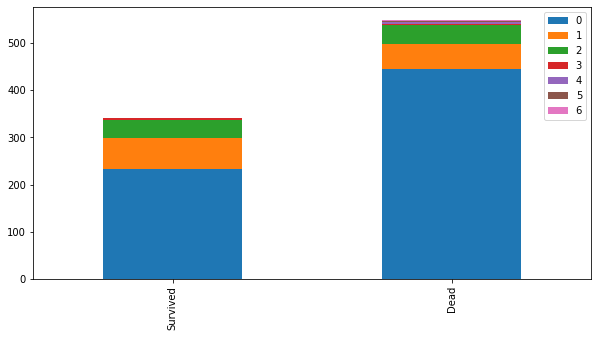

In [187]:
bar_chart("Parch")

---
# **Data Preprocessing**





In [188]:
train_test = [df_train, df_test]

**Name Feature**

In [189]:
for dataset in train_test: #train과 test set 모두에서
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.') # Mr, Mrs 이러한 부분만 추출하여 새로운 feature 생성
dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [190]:
df_train[['Sex','Title']].head()

,Sex,Title
0,male,Mr
1,female,Mrs
2,female,Miss
3,female,Mrs
4,male,Mr


In [191]:
pd.crosstab(df_train['Title'], df_train['Sex']) # pd.crosstab(행, 열)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [192]:
for dataset in train_test: #원하는 값으로 대체하기
  dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don','Dona', 'Dr', 'Jonkheer',
                                               'Lady','Major', 'Rev', 'Sir'], 'ETC')
  dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

df_train[['Title','Survived']].groupby(['Title'], as_index = False).mean().sort_values(by='Survived',ascending=False) #title을 기준으로 survived와 묶어서 해당 title의 survived평균을 구하여 정렬

,Title,Survived
4,Mrs,0.793651
2,Miss,0.702703
1,Master,0.575000
0,ETC,0.347826
3,Mr,0.156673


In [193]:
for dataset in train_test:
  dataset['Title'] = dataset['Title'].astype(str)

**Sex Feature**

In [194]:
for dataset in train_test:
  dataset['Sex'] = dataset['Sex'].astype(str)

**Embarked Feature**

In [195]:
df_train['Embarked'].value_counts(dropna=False) #dropna =Flase _ nan값까지 세어줌...

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [197]:
for dataset in train_test:
  dataset['Embarked'] = dataset['Embarked'].fillna('S') #NaN을 최빈값인 S로 대체
  dataset['Embarked'] = dataset['Embarked'].astype(str)

**Age Feature**

In [198]:
df_train['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [199]:
for dataset in train_test:
  dataset['Age'].fillna(dataset['Age'].mean(), inplace=True) # inplace=True, 채우고 저장함
  dataset['Age'] = dataset['Age'].astype(int)
  df_train['AgeBand'] = pd.cut(df_train['Age'],5) # 5개의 구간으로 나눔
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean()

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [200]:
for dataset in train_test:
  dataset.loc[dataset['Age'] <= 16, 'Age'] = 0 #dataset.loc[row, column] _ 전체 sample중에서 Age가 16보다 작은 사람들의 Age 값을 0으로 할당
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
  dataset['Age'] = dataset['Age'].map( { 0: 'Child',  1: 'Young', 2: 'Middle', 3: 'Prime', 4: 'Old'} ).astype(str) #classification 진행

**Fare Feature**

In [201]:
print(df_train[['Pclass','Fare']].groupby(['Pclass'], as_index=False).mean())
print()
print(df_test[df_test['Fare'].isnull()]['Pclass'])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


In [214]:
df_test['Fare'] = df_test['Fare'].fillna(13.675)

In [215]:
for dataset in train_test:
  dataset['Fare'] = dataset['Fare'].astype(int)

**Sibsp & Parch Feature**

In [203]:
for dataset in train_test:
  dataset['Family'] = dataset['Parch'] + dataset['SibSp']
  dataset['Family'] = dataset['Family'].astype(int)

**Drop the else features**

In [204]:
features_drop = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch']
df_train = df_train.drop(features_drop, axis=1) #axis=1 _ column에 있는 해당 줄을 삭제하므로 axis =1, 0은 row
df_test = df_test.drop(features_drop, axis=1)
df_train = df_train.drop(['PassengerId', 'AgeBand'], axis=1)

In [218]:
print(df_train.head())
print(df_test.head())

   Survived  Pclass     Sex     Age     Fare Embarked Title  Family
0         0       3    male   Young   7.2500        S    Mr       1
1         1       1  female  Middle  71.2833        C   Mrs       1
2         1       3  female   Young   7.9250        S  Miss       0
3         1       1  female  Middle  53.1000        S   Mrs       1
4         0       3    male  Middle   8.0500        S    Mr       0
   PassengerId  Pclass     Sex     Age  Fare Embarked Title  Family
0          892       3    male  Middle     7        Q    Mr       0
1          893       3  female  Middle     7        S   Mrs       1
2          894       2    male   Prime     9        Q    Mr       0
3          895       3    male   Young     8        S    Mr       0
4          896       3  female   Young    12        S   Mrs       2


In [219]:
#One-Hot Encoding
train = pd.get_dummies(df_train)
test = pd.get_dummies(df_test)
print(train.head())
print(test.head())

   Survived  Pclass     Fare  ...  Title_Miss  Title_Mr  Title_Mrs
0         0       3   7.2500  ...           0         1          0
1         1       1  71.2833  ...           0         0          1
2         1       3   7.9250  ...           1         0          0
3         1       1  53.1000  ...           0         0          1
4         0       3   8.0500  ...           0         1          0

[5 rows x 19 columns]
   PassengerId  Pclass  Fare  ...  Title_Miss  Title_Mr  Title_Mrs
0          892       3     7  ...           0         1          0
1          893       3     7  ...           0         0          1
2          894       2     9  ...           0         1          0
3          895       3     8  ...           0         1          0
4          896       3    12  ...           0         0          1

[5 rows x 19 columns]


In [220]:
# train, test , set label
train_label = train['Survived'] # Survived만 따로 저장해주기
train_data = train.drop('Survived',axis=1).copy() #Survived를 떨군 새로운 train set 생성
test_data = test.drop('PassengerId', axis=1).copy() #평가를 위해 필요없는 PassengerId속성 떨구기

**Train Model**

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [209]:
train_data,train_label = shuffle(train_data, train_label, random_state = 5)

In [210]:
def train_and_test(model):
  model.fit(train_data, train_label)
  prediction = model.predict(test_data)
  accuracy = "%.2f" %(model.score(train_data,train_label)*100)
  print("Accuracy", accuracy,"%")
  return prediction

In [165]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
#kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors = 4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Navie Bayes
nb_pred = train_and_test(GaussianNB())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy 82.94 %
Accuracy 68.91 %
Accuracy 86.31 %
Accuracy 94.50 %
Accuracy 79.12 %


In [171]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": rf_pred})
submission.to_csv('submission_rf.csv', index=False)